# Project Overview
In this project, you will work with the Seattle Weather dataset, which includes daily weather observations such as temperature, precipitation, and other weather-related metrics for Seattle. The goal is to preprocess the data, perform exploratory data analysis (EDA), and build and evaluate various regression models to predict a target variable. This project is divided into three main parts: Data Preprocessing, Exploratory Data Analysis (EDA), and Regression Modeling.


# Name: Rubab Shahid and Mehwish Ghaffar

 ## Part 1: Data Preprocessing
 1.	Missing Values:

o	Identify and list all columns in the dataset that have missing values.

In [1]:
import pandas as pd
data=pd.read_csv('weather.csv')
data.isna()

,date,precipitation,temp_max,temp_min,wind,weather
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1456,False,False,False,False,False,False
1457,False,False,False,False,False,False
1458,False,False,False,False,False,False
1459,False,False,False,False,False,False


#There is no null data

o	Calculate the percentage of missing values for each column in the dataset.

In [3]:
missing_values=data['date'].isna().sum()
total_length=len(data['date'])
missing_percentage=(missing_values/total_length)*100
print("The percentage of missing values for date column :",missing_percentage)


missing_values=data['precipitation'].isna().sum()
total_length=len(data['precipitation'])
missing_percentage=(missing_values/total_length)*100
print("The percentage of missing values for precipitation column :",missing_percentage)

missing_values=data['date'].isna().sum()
total_length=len(data['date'])
missing_percentage=(missing_values/total_length)*100
print("The percentage of missing values for date column :",missing_percentage)


missing_values=data['temp_max'].isna().sum()
total_length=len(data['temp_max'])
missing_percentage=(missing_values/total_length)*100
print("The percentage of missing values for temp_max column :",missing_percentage)


missing_values=data['temp_min'].isna().sum()
total_length=len(data['temp_min'])
missing_percentage=(missing_values/total_length)*100
print("The percentage of missing values for temp_min column :",missing_percentage)


missing_values=data['wind'].isna().sum()
total_length=len(data['wind'])
missing_percentage=(missing_values/total_length)*100
print("The percentage of missing values for wind column :",missing_percentage)


missing_values=data['weather'].isna().sum()
total_length=len(data['weather'])
missing_percentage=(missing_values/total_length)*100
print("The percentage of missing values for weather column :",missing_percentage)




The percentage of missing values for date column : 0.0
The percentage of missing values for precipitation column : 0.0
The percentage of missing values for date column : 0.0
The percentage of missing values for temp_max column : 0.0
The percentage of missing values for temp_min column : 0.0
The percentage of missing values for wind column : 0.0
The percentage of missing values for weather column : 0.0


o	For the Max Temperature column, how would you handle the missing values? Describe your approach.

In [6]:

# Firstly find the missing values of temp_max column
missing_values=data['temp_max'].isna().sum()
 #if found then fill it 
data.fillna(data['temp_max'].mean())
#But there is no missing values found

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


o	For the Precipitation column, how would you impute missing values? What method would you choose and why?

In [5]:

# Firstly find the missing values of temp_max column
missing_values=data['precipitation'].isna().sum()
 #if found then fill it 
data.fillna(data['precipitation'].mean())
#But there is no missing values found

#Data is normally distributed thats why we choose mean method .

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


o	How would you handle missing values in the Wind Speed column for the dataset?


 # PART 2.	Outlier Handling:

o	Identify outliers in the max and min Temperature column using a suitable method (e.g., Z-score or IQR). Describe your findings.

In [6]:
#We can handle outlier by various method .Some of them are:
#1.Inter quantile range
#2.Z_score
#This data is normally distributed thats why we use Z_score to handle outlier in precipitation
import numpy as np
z_scores=np.abs((data['precipitation']-data['precipitation'].mean()))/data['precipitation'].std()
z_scores
d1=pd.DataFrame(z_scores)
d1

,precipitation
0,0.453495
1,1.178194
2,0.333738
3,2.585339
4,0.258889
...,...
1456,0.833893
1457,0.228950
1458,0.453495
1459,0.453495


In [9]:
data['transformed_wind']=np.log1p(data['wind'])
data

,date,precipitation,temp_max,temp_min,wind,weather,transformed_wind
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1.740466
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1.704748
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1.193922
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1.740466
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1.960095
...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,1.360977
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,0.832909
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,1.280934
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,1.481605


C:\Users\HP\AppData\Local\Temp\ipykernel_5036\1506924251.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="precipitation",palette="husl",data=data)


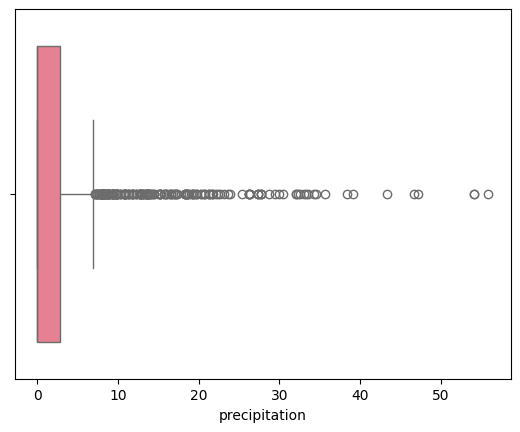

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="precipitation",palette="husl",data=data)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_5036\3299070074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="precipitation",palette="husl",data=d1)


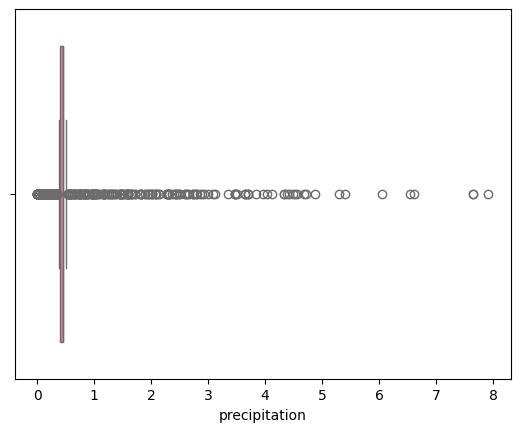

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="precipitation",palette="husl",data=d1)
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s_tempmax = scaler.fit_transform(data['temp_max'].values.reshape(-1,1))
data['s_tempmax']=s_tempmax

s_tempmin = scaler.fit_transform(data['temp_min'].values.reshape(-1,1))
data['s_tempmin']=s_tempmin
data

,date,precipitation,temp_max,temp_min,wind,weather,s_tempmax,s_tempmin
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,-0.495299,-0.644212
1,2012-01-02,10.9,10.6,2.8,4.5,rain,-0.794731,-1.082347
2,2012-01-03,0.8,11.7,7.2,2.3,rain,-0.645015,-0.206077
3,2012-01-04,20.3,12.2,5.6,4.7,rain,-0.576962,-0.524720
4,2012-01-05,1.3,8.9,2.8,6.1,rain,-1.026111,-1.082347
...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,-1.638585,-1.301414
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,-1.556922,-1.301414
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,-1.257490,-1.520481
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,-1.475259,-1.839125


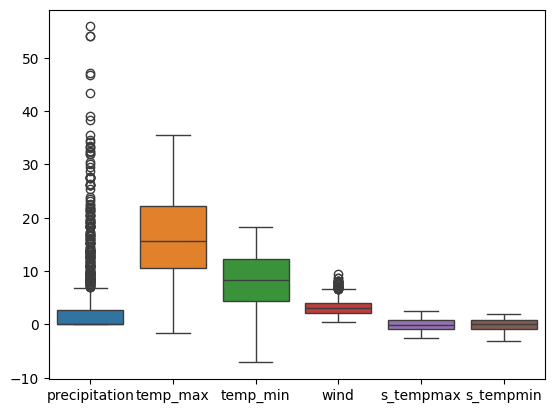

In [10]:
sns.boxplot(data=data)
plt.show()

# 3.	Scaling and Transformation:

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
s_tempmax = scaler.fit_transform(data['temp_max'].values.reshape(-1,1))
data['s_tempmax']=s_tempmax

s_tempmin = scaler.fit_transform(data['temp_min'].values.reshape(-1,1))
data['s_tempmin']=s_tempmin
data

,date,precipitation,temp_max,temp_min,wind,weather,s_tempmax,s_tempmin
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0.387097,0.476378
1,2012-01-02,10.9,10.6,2.8,4.5,rain,0.327957,0.389764
2,2012-01-03,0.8,11.7,7.2,2.3,rain,0.357527,0.562992
3,2012-01-04,20.3,12.2,5.6,4.7,rain,0.370968,0.500000
4,2012-01-05,1.3,8.9,2.8,6.1,rain,0.282258,0.389764
...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,0.161290,0.346457
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,0.177419,0.346457
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,0.236559,0.303150
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,0.193548,0.240157


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s_precipitation = scaler.fit_transform(data['precipitation'].values.reshape(-1,1))
data['s_precipitation']=s_precipitation
data

,date,precipitation,temp_max,temp_min,wind,weather,s_tempmax,s_tempmin,s_precipitation
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0.387097,0.476378,-0.453650
1,2012-01-02,10.9,10.6,2.8,4.5,rain,0.327957,0.389764,1.178598
2,2012-01-03,0.8,11.7,7.2,2.3,rain,0.357527,0.562992,-0.333852
3,2012-01-04,20.3,12.2,5.6,4.7,rain,0.370968,0.500000,2.586224
4,2012-01-05,1.3,8.9,2.8,6.1,rain,0.282258,0.389764,-0.258978
...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,0.161290,0.346457,0.834179
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,0.177419,0.346457,-0.229029
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,0.236559,0.303150,-0.453650
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,0.193548,0.240157,-0.453650


o	Apply a logarithmic transformation to the Wind Speed feature if needed. Describe the impact on the feature's distribution.

In [17]:
data['transformed_wind']=np.log1p(data['wind'])
data

,date,precipitation,temp_max,temp_min,wind,weather,s_tempmax,s_tempmin,s_precipitation,transformed_wind
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0.387097,0.476378,-0.453650,1.740466
1,2012-01-02,10.9,10.6,2.8,4.5,rain,0.327957,0.389764,1.178598,1.704748
2,2012-01-03,0.8,11.7,7.2,2.3,rain,0.357527,0.562992,-0.333852,1.193922
3,2012-01-04,20.3,12.2,5.6,4.7,rain,0.370968,0.500000,2.586224,1.740466
4,2012-01-05,1.3,8.9,2.8,6.1,rain,0.282258,0.389764,-0.258978,1.960095
...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,0.161290,0.346457,0.834179,1.360977
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,0.177419,0.346457,-0.229029,0.832909
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,0.236559,0.303150,-0.453650,1.280934
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,0.193548,0.240157,-0.453650,1.481605


##Part 4.	Feature Engineering:

o	Create a new feature that represents the Temperature in Celsius from the given Fahrenheit values. Describe the transformation applied.

In [18]:
def fahrenheit_to_celsius(temp_max):
    return (temp_max-32)*5.0/9.0

data['Celsius']=data['temp_max'].apply(fahrenheit_to_celsius)
print(data)

            date  precipitation  temp_max  temp_min  wind  weather  s_tempmax  \
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle   0.387097   
1     2012-01-02           10.9      10.6       2.8   4.5     rain   0.327957   
2     2012-01-03            0.8      11.7       7.2   2.3     rain   0.357527   
3     2012-01-04           20.3      12.2       5.6   4.7     rain   0.370968   
4     2012-01-05            1.3       8.9       2.8   6.1     rain   0.282258   
...          ...            ...       ...       ...   ...      ...        ...   
1456  2015-12-27            8.6       4.4       1.7   2.9     rain   0.161290   
1457  2015-12-28            1.5       5.0       1.7   1.3     rain   0.177419   
1458  2015-12-29            0.0       7.2       0.6   2.6      fog   0.236559   
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun   0.193548   
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun   0.193548   

      s_tempmin  s_precipit

o	Generate an interaction term between Humidity and Wind Speed. How does this new feature impact the dataset?

In [19]:
data['Humidity']=data['precipitation']*data['wind']

In [29]:
data

,date,precipitation,temp_max,temp_min,wind,s_tempmax,s_tempmin,s_precipitation,transformed_wind,Celsius,Humidity,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.0,12.8,5.0,4.7,0.387097,0.476378,-0.453650,1.740466,-10.666667,0.00,True,False,False,False,False
1,2012-01-02,10.9,10.6,2.8,4.5,0.327957,0.389764,1.178598,1.704748,-11.888889,49.05,False,False,True,False,False
2,2012-01-03,0.8,11.7,7.2,2.3,0.357527,0.562992,-0.333852,1.193922,-11.277778,1.84,False,False,True,False,False
3,2012-01-04,20.3,12.2,5.6,4.7,0.370968,0.500000,2.586224,1.740466,-11.000000,95.41,False,False,True,False,False
4,2012-01-05,1.3,8.9,2.8,6.1,0.282258,0.389764,-0.258978,1.960095,-12.833333,7.93,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,0.161290,0.346457,0.834179,1.360977,-15.333333,24.94,False,False,True,False,False
1457,2015-12-28,1.5,5.0,1.7,1.3,0.177419,0.346457,-0.229029,0.832909,-15.000000,1.95,False,False,True,False,False
1458,2015-12-29,0.0,7.2,0.6,2.6,0.236559,0.303150,-0.453650,1.280934,-13.777778,0.00,False,True,False,False,False
1459,2015-12-30,0.0,5.6,-1.0,3.4,0.193548,0.240157,-0.453650,1.481605,-14.666667,0.00,False,False,False,False,True


o	Encode the Weather Condition categorical feature using one-hot encoding. What new columns are created?

In [36]:
#convert each category into binary vector
df=pd.get_dummies(df , columns=['weather'])
data

,date,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.0,12.8,5.0,4.7,True,False,False,False,False
1,2012-01-02,10.9,10.6,2.8,4.5,False,False,True,False,False
2,2012-01-03,0.8,11.7,7.2,2.3,False,False,True,False,False
3,2012-01-04,20.3,12.2,5.6,4.7,False,False,True,False,False
4,2012-01-05,1.3,8.9,2.8,6.1,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,False,False,True,False,False
1457,2015-12-28,1.5,5.0,1.7,1.3,False,False,True,False,False
1458,2015-12-29,0.0,7.2,0.6,2.6,False,True,False,False,False
1459,2015-12-30,0.0,5.6,-1.0,3.4,False,False,False,False,True


In [43]:
import pandas as pd
data=pd.read_csv('weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


#5. Feature Selection:

In [47]:
data=data.drop(columns=['date'],axis=1)
data

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [48]:
data.corr()

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
X = data[['precipitation', 'temp_min', 'wind']]
y = data['temp_max']
model = LinearRegression()
selector = RFE(model, n_features_to_select=2)  # Select 2 features
selector = selector.fit(X, y)
ranking = selector.ranking_
selected_features = X.columns[selector.support_]
print("Selected features:", selected_features)
print("Feature ranking:", ranking)

Selected features: Index(['temp_min', 'wind'], dtype='object')
Feature ranking: [2 1 1]


In [53]:
from sklearn.decomposition import PCA
# Define features
X = data[['temp_max', 'temp_min', 'precipitation', 'wind']]
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-0.86978162,  0.06119436,  1.06345488,  0.07149117],
       [-1.78079141,  0.80151181, -0.16673354,  0.34323363],
       [-0.30131518, -0.84400372, -0.22974058, -0.37787795],
       ...,
       [-1.56542501, -1.35490468,  0.06646489,  0.08469007],
       [-2.0555218 , -1.14000523,  0.47338619,  0.16705402],
       [-2.21228182, -1.16917993,  0.53564872,  0.3204473 ]])

In [55]:
df=pd.DataFrame(X_pca , columns=data.columns)
df

,precipitation,temp_max,temp_min,wind
0,-0.869782,0.061194,1.063455,0.071491
1,-1.780791,0.801512,-0.166734,0.343234
2,-0.301315,-0.844004,-0.229741,-0.377878
3,-1.719245,2.026200,-1.089524,0.280365
4,-1.807821,0.572753,1.627562,0.048687
...,...,...,...,...
1456,-2.104042,-0.395737,-0.716582,-0.183671
1457,-1.461347,-1.792884,-0.750739,-0.283630
1458,-1.565425,-1.354905,0.066465,0.084690
1459,-2.055522,-1.140005,0.473386,0.167054


##Part 2: Exploratory Data Analysis (EDA)

##1.	Descriptive Analysis:

In [57]:
# Calculate statistics for the 'temp_max' column
mean_temp = data['temp_max'].mean()
median_temp = data['temp_max'].median()
std_dev_temp = data['temp_max'].std()

# Print the calculated statistics
print(f"Mean Max Temperature: {mean_temp}")
print(f"Median Max Temperature: {median_temp}")
print(f"Standard  Max Deviation of Temperature: {std_dev_temp}")


# Calculate statistics for the 'temp_min' column
mean_temp = data['temp_min'].mean()
median_temp = data['temp_min'].median()
std_dev_temp = data['temp_min'].std()

# Print the calculated statistics
print(f"Mean Min Temperature: {mean_temp}")
print(f"Median Min Temperature: {median_temp}")
print(f"Standard Deviation of Min Temperature: {std_dev_temp}")

Mean Max Temperature: 16.43908281998631
Median Max Temperature: 15.6
Standard  Max Deviation of Temperature: 7.349758097360177
Mean Min Temperature: 8.234770704996578
Median Min Temperature: 8.3
Standard Deviation of Min Temperature: 5.023004179961266


In [61]:
# Compute summary statistics for Wind 
wind_stats = data['wind'].describe()
wind_mean = data['wind'].mean()
wind_median = data['wind'].median()
wind_std = data['wind'].std()
wind_min = data['wind'].min()
wind_max = data['wind'].max()

# Compute summary statistics for precipitation
precipitation_stats = data['precipitation'].describe()
precipitation_mean = data['precipitation'].mean()
precipitation_median = data['precipitation'].median()
precipitation_std = data['precipitation'].std()
precipitation_min = data['precipitation'].min()
precipitation_max = data['precipitation'].max()


# Display the statistics
print("Wind Speed Summary Statistics:")
print(f"Mean: {wind_mean}")
print(f"Median: {wind_median}")
print(f"Standard Deviation: {wind_std}")
print(f"Minimum: {wind_min}")
print(f"Maximum: {wind_max}")

# Display the statistics
print("Precipitation Summary Statistics:")
print(f"Mean: {precipitation_mean}")
print(f"Median: {precipitation_median}")
print(f"Standard Deviation: {precipitation_std}")
print(f"Minimum: {precipitation_min}")
print(f"Maximum: {precipitation_max}")

Wind Speed Summary Statistics:
Mean: 3.24113620807666
Median: 3.0
Standard Deviation: 1.4378250588746193
Minimum: 0.4
Maximum: 9.5
Precipitation Summary Statistics:
Mean: 3.02943189596167
Median: 0.0
Standard Deviation: 6.680194322314738
Minimum: 0.0
Maximum: 55.9


In [8]:
import pandas as pd
data=pd.read_csv('weather.csv')
df=data.drop(columns=['weather'],axis=1)
df

,date,precipitation,temp_max,temp_min,wind
0,2012-01-01,0.0,12.8,5.0,4.7
1,2012-01-02,10.9,10.6,2.8,4.5
2,2012-01-03,0.8,11.7,7.2,2.3
3,2012-01-04,20.3,12.2,5.6,4.7
4,2012-01-05,1.3,8.9,2.8,6.1
...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9
1457,2015-12-28,1.5,5.0,1.7,1.3
1458,2015-12-29,0.0,7.2,0.6,2.6
1459,2015-12-30,0.0,5.6,-1.0,3.4


In [9]:
df['date']=pd.to_datetime(data['date'])
df['month']=df['date'].dt.month
# Compute monthly averages for Temperature and Precipitation
monthly_averages = df.groupby('month').agg({
    'temp_max': 'mean',
    'precipitation': 'mean'
}).reset_index()

# Rename columns for clarity
monthly_averages.columns = ['Month', 'Average_Min_Temperature', 'Average_Max_Precipitation']

# Display the summary table
print(monthly_averages)


    Month  Average_Min_Temperature  Average_Max_Precipitation
0       1                 8.229032                   3.758065
1       2                 9.860177                   3.734513
2       3                12.387097                   4.888710
3       4                15.020000                   3.128333
4       5                19.295968                   1.673387
5       6                22.400000                   1.107500
6       7                25.998387                   0.388710
7       8                26.112097                   1.320161
8       9                21.924167                   1.962500
9      10                16.389516                   4.059677
10     11                11.023333                   5.354167
11     12                 8.194355                   5.021774


#2.	Visualization Tasks:

In [ ]:
o	Create a histogram for the Temperature feature to visualize its distribution.

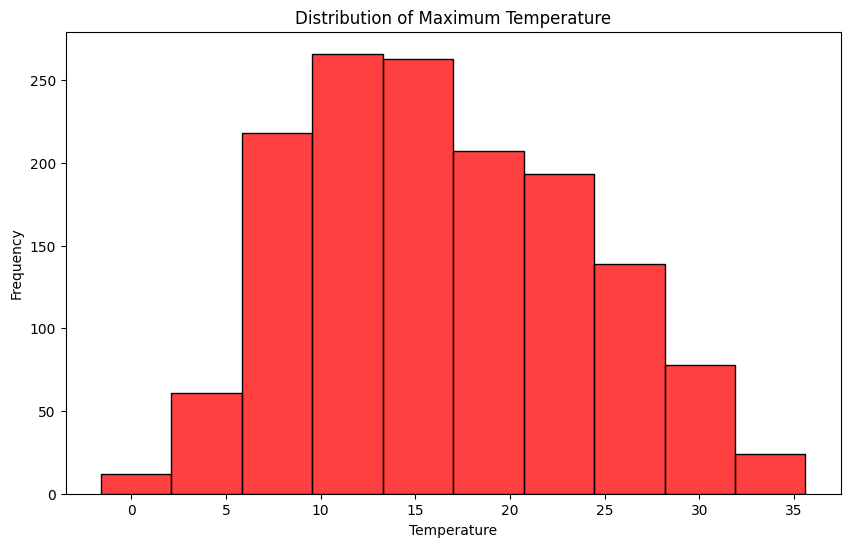

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histogram for the 'temp_max' feature
plt.figure(figsize=(10, 6))
sns.histplot(data['temp_max'], bins=10, kde=False, color='red', edgecolor='black')
# Customize the plot
plt.title('Distribution of Maximum Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Display the plot
plt.show()


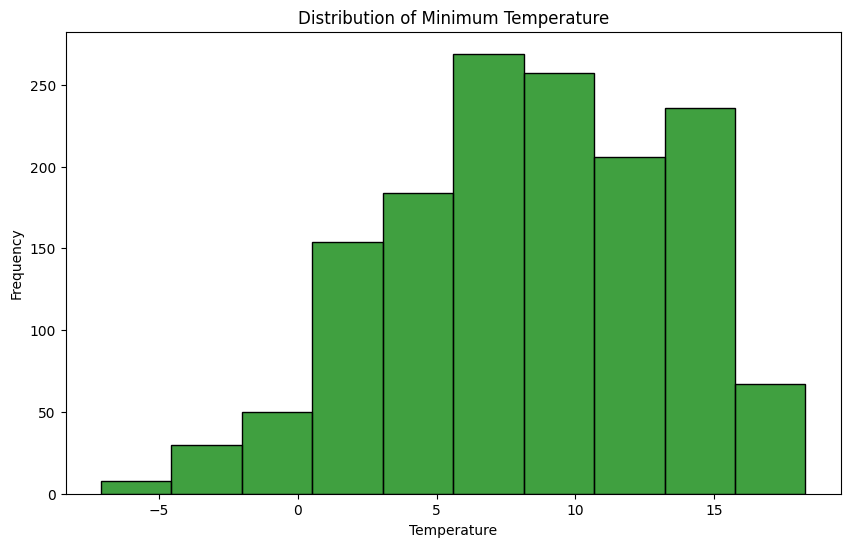

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histogram for the 'temp_min' feature
plt.figure(figsize=(10, 6))
sns.histplot(data['temp_min'], bins=10, kde=False, color='green', edgecolor='black')
# Customize the plot
plt.title('Distribution of Minimum Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Display the plot
plt.show()


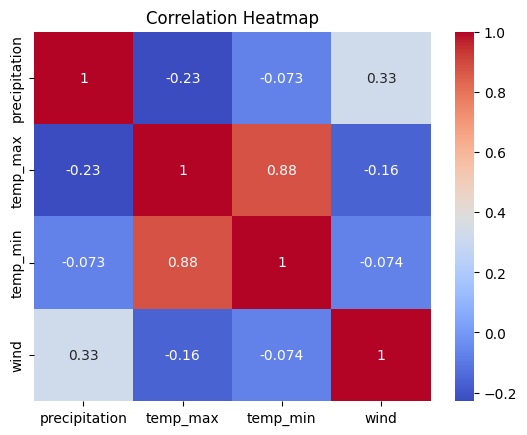

In [72]:

# Plot the heatmap

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

# Customize the plot
plt.title('Correlation Heatmap')
plt.show()

In [80]:
import pandas as pd
data=pd.read_csv('weather.csv')
data=data.drop(columns=['weather'],axis=1)
data


,date,precipitation,temp_max,temp_min,wind
0,2012-01-01,0.0,12.8,5.0,4.7
1,2012-01-02,10.9,10.6,2.8,4.5
2,2012-01-03,0.8,11.7,7.2,2.3
3,2012-01-04,20.3,12.2,5.6,4.7
4,2012-01-05,1.3,8.9,2.8,6.1
...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9
1457,2015-12-28,1.5,5.0,1.7,1.3
1458,2015-12-29,0.0,7.2,0.6,2.6
1459,2015-12-30,0.0,5.6,-1.0,3.4


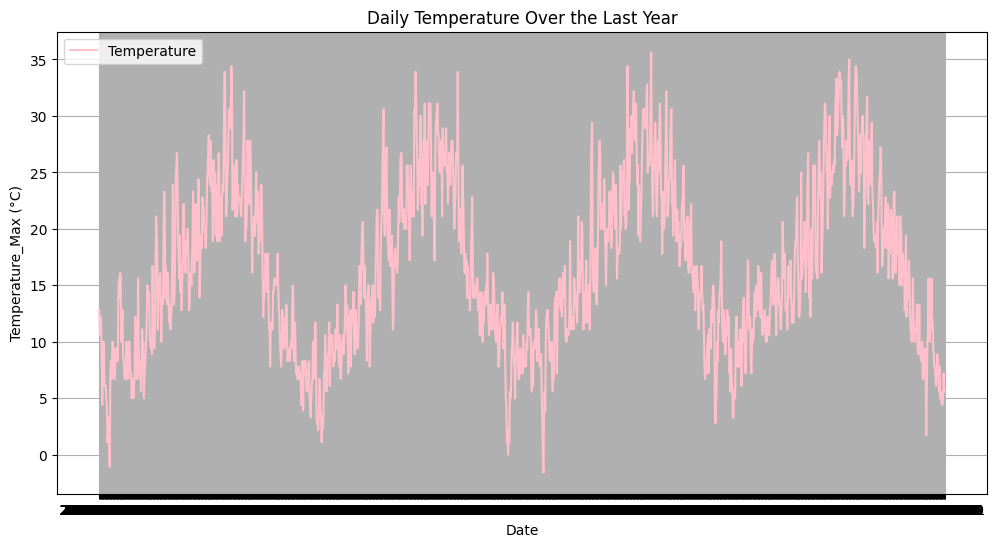

In [79]:
 #Plot the time-series data
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['temp_max'], label='Temperature', color='pink')

# Customize the plot
plt.title('Daily Temperature Over the Last Year')
plt.xlabel('Date')
plt.ylabel('Temperature_Max (°C)')
plt.legend()
plt.grid(True)


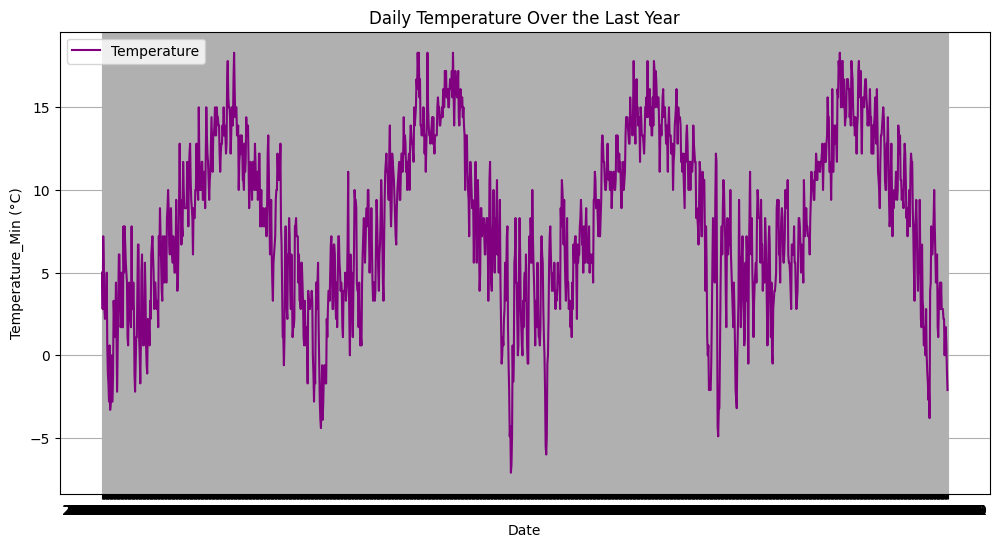

In [82]:
 #Plot the time-series data
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['temp_min'], label='Temperature', color='purple')

# Customize the plot
plt.title('Daily Temperature Over the Last Year')
plt.xlabel('Date')
plt.ylabel('Temperature_Min (°C)')
plt.legend()
plt.grid(True)


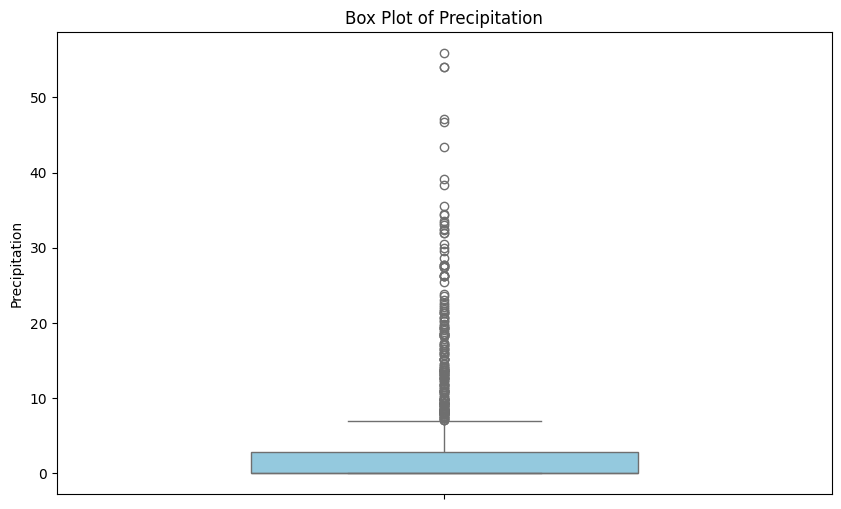

In [85]:
# Plot the box plot for the 'precipitation' feature
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['precipitation'], color='skyblue', width=0.5)

# Customize the plot
plt.title('Box Plot of Precipitation')
plt.ylabel('Precipitation')

# Display the plot
plt.show()

#3.	Conditional Analysis:

In [11]:
import pandas as pd
data=pd.read_csv('weather.csv')
data=data.drop(columns=['date'],axis=1)
data

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [12]:
# Calculate descriptive statistics by weather condition
descriptive_stats = data.groupby('weather').agg({
    'temp_max': ['mean', 'median', 'std'],
    'temp_min': ['mean', 'median', 'std']
}).reset_index()

# Display the summary table
print(descriptive_stats)

   weather   temp_max                   temp_min                 
                 mean median       std      mean median       std
0  drizzle  15.926415   16.1  8.812036  7.111321    8.3  6.182191
1      fog  16.757426   16.1  6.774723  7.979208    8.3  5.011992
2     rain  13.454602   12.8  4.973029  7.588768    7.2  3.951851
3     snow   5.573077    5.6  3.109155  0.146154    0.6  2.237182
4      sun  19.861875   21.1  7.698258  9.343750   10.6  5.508277


C:\Users\HP\AppData\Local\Temp\ipykernel_5920\2273605662.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather', y='temp_max', data=data, palette='Set1')
C:\Users\HP\AppData\Local\Temp\ipykernel_5920\2273605662.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather', y='temp_min', data=data, palette='Set2')


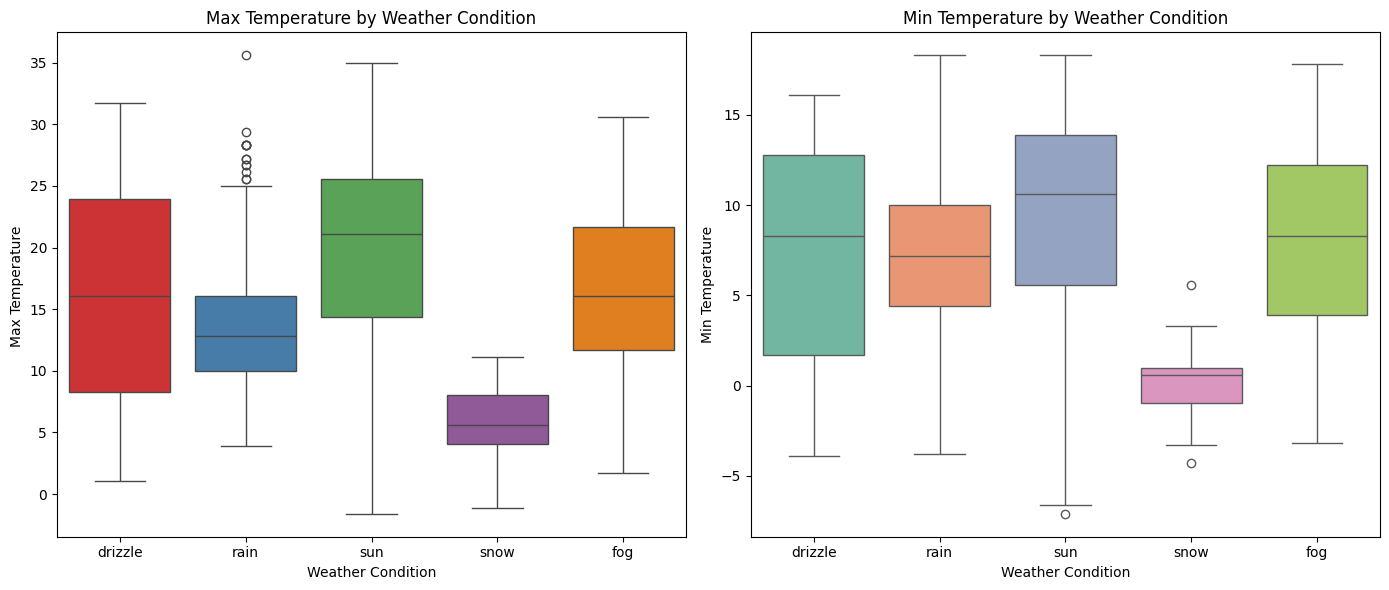

In [21]:
#Or Second solution
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plots for temperature features by weather condition
plt.figure(figsize=(14, 6))

# Max Temperature
plt.subplot(1, 2, 1)
sns.boxplot(x='weather', y='temp_max', data=data, palette='Set1')
plt.title('Max Temperature by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Max Temperature ')

# Min Temperature
plt.subplot(1, 2, 2)
sns.boxplot(x='weather', y='temp_min', data=data, palette='Set2')
plt.title('Min Temperature by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Min Temperature')

plt.tight_layout()
plt.show()


In [25]:
# Create a new column for rainy vs. non-rainy days
data['rainy_days'] = data['weather'].apply(lambda x: 'Rainy' if x == 'Rainy' else 'Non-Rainy')


In [26]:
data

,precipitation,temp_max,temp_min,wind,weather,rainy_day,rainy_days
0,0.0,12.8,5.0,4.7,drizzle,Non-Rainy,Non-Rainy
1,10.9,10.6,2.8,4.5,rain,Non-Rainy,Non-Rainy
2,0.8,11.7,7.2,2.3,rain,Non-Rainy,Non-Rainy
3,20.3,12.2,5.6,4.7,rain,Non-Rainy,Non-Rainy
4,1.3,8.9,2.8,6.1,rain,Non-Rainy,Non-Rainy
...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain,Non-Rainy,Non-Rainy
1457,1.5,5.0,1.7,1.3,rain,Non-Rainy,Non-Rainy
1458,0.0,7.2,0.6,2.6,fog,Non-Rainy,Non-Rainy
1459,0.0,5.6,-1.0,3.4,sun,Non-Rainy,Non-Rainy


C:\Users\HP\AppData\Local\Temp\ipykernel_5920\2239475219.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rainy_days', y='wind', data=data, palette='deep')


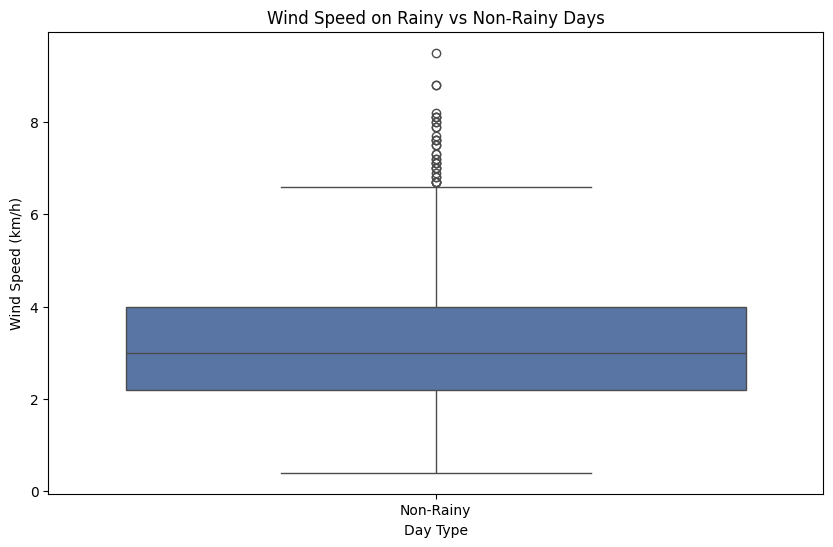

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plot for wind speed on rainy vs. non-rainy days
plt.figure(figsize=(10, 6))
sns.boxplot(x='rainy_days', y='wind', data=data, palette='deep')
plt.title('Wind Speed on Rainy vs Non-Rainy Days')
plt.xlabel('Day Type')
plt.ylabel('Wind Speed (km/h)')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_5920\1192866204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='rainy_day', y='wind', data=data, palette='coolwarm')


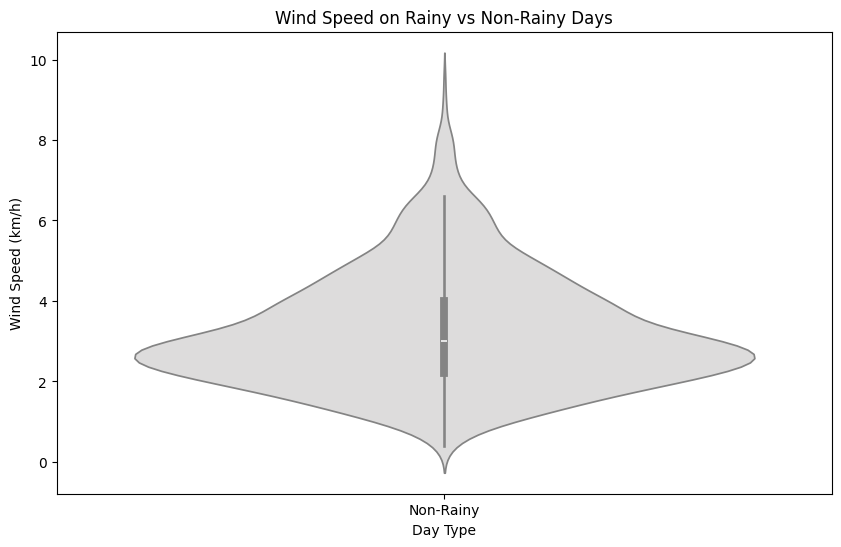

In [31]:
# Plot violin plot for wind speed on rainy vs. non-rainy days
plt.figure(figsize=(10, 6))
sns.violinplot(x='rainy_day', y='wind', data=data, palette='coolwarm')
plt.title('Wind Speed on Rainy vs Non-Rainy Days')
plt.xlabel('Day Type')
plt.ylabel('Wind Speed (km/h)')
plt.show()


#4. Advanced Visualizations:

In [36]:
import pandas as pd
data=pd.read_csv('weather.csv')
data=data.drop(columns=['date'],axis=1)
data

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


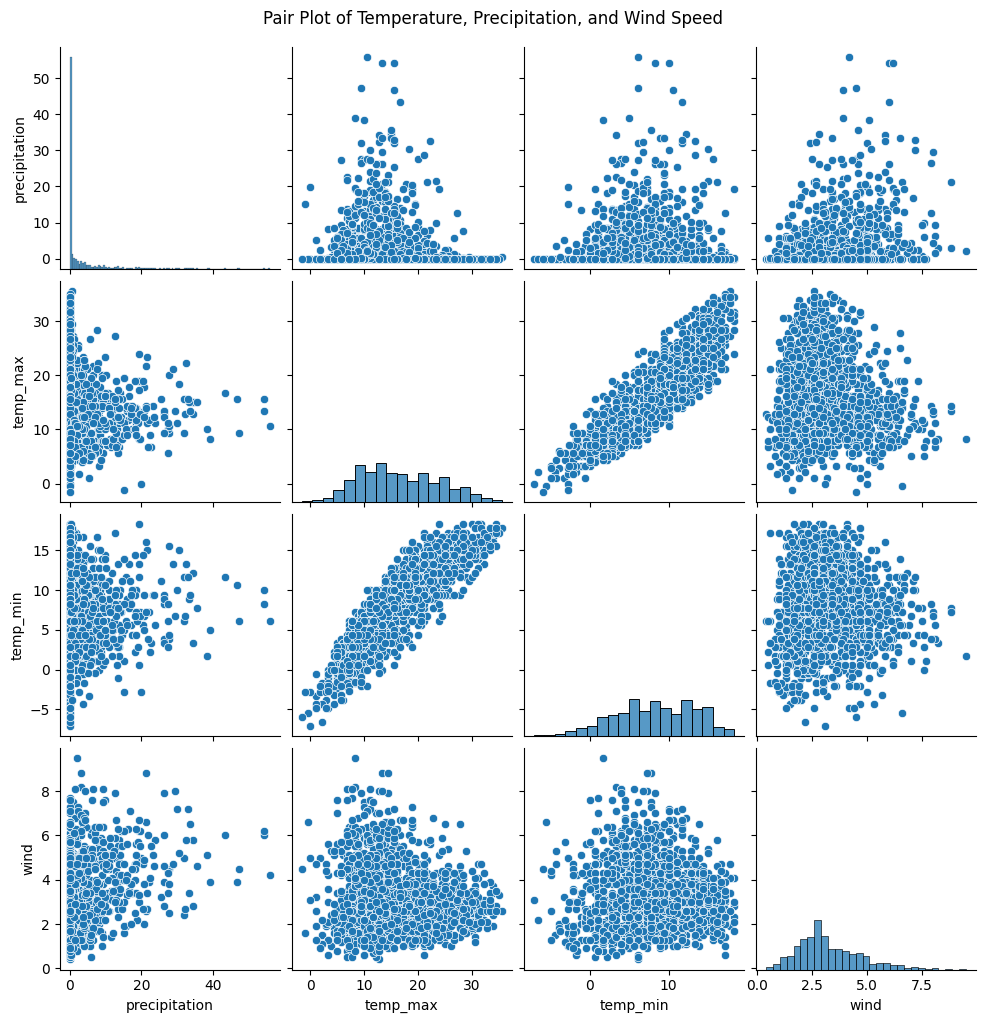

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pair plot
sns.pairplot(data)
plt.suptitle('Pair Plot of Temperature, Precipitation, and Wind Speed', y=1.02)
plt.show()


###Part 3: Regression Modeling

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

# Split the data into training and testing sets
X = data[['precipitation']]
y = data['temp_max']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#print the results
print('Test Mean Squared Error:', mse_test)
print('Test R^2 Score:', r2_test)

Test Mean Squared Error: 49.96174487081367
Test R^2 Score: 0.059906613111584295


In [70]:
import pandas as pd
data=pd.read_csv('weather.csv')
data=data.drop(columns=['date'],axis=1)
data

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [71]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Encode the categorical target variable
le = LabelEncoder()
data['weather'] = le.fit_transform(data['weather'])


X = data[['temp_max', 'temp_max', 'precipitation']]
y = data['weather']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
#print the results
print('Test Mean Squared Error:', mse_test)
print('Test R^2 Score:', r2_test)


Test Mean Squared Error: 1.328018223234624
Test R^2 Score: 0.050312435063971095


In [72]:
import pandas as pd
data=pd.read_csv('weather.csv')
data=data.drop(columns=['date'],axis=1)
data

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [73]:
data=data.drop(columns=['weather'],axis=1)
data

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [74]:
from sklearn.preprocessing import PolynomialFeatures

x=data[['temp_max']].values
y=data[['precipitation']].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

linear_regressor=LinearRegression()
linear_regressor.fit(x_train,y_train)

y_pred_linear=linear_regressor.predict(x_test)
r2_linear=r2_score(y_test,y_pred_linear)
mse_linear=mean_squared_error(y_test,y_pred_linear)

poly_features=PolynomialFeatures(degree=2)
x_poly_train=poly_features.fit_transform(x_train)
x_poly_test=poly_features.fit_transform(x_test)

poly_regressor=LinearRegression()
poly_regressor.fit(x_poly_train,y_train)
y_pred_poly=poly_regressor.predict(x_poly_test)
r2_poly=r2_score(y_test,y_pred_poly)
mse_poly=mean_squared_error(y_test,y_pred_poly)

print('Linear Regression R^2 SCORE: ',r2_linear)
print(f'Polynomial Regression (degree 2)R^2 score: ',r2_poly)
print('Linear Mean Square Error',mse_linear)
print('Poly Mean Square Error',mse_poly)

Linear Regression R^2 SCORE:  0.0601146815440875
Polynomial Regression (degree 2)R^2 score:  0.0695926452557657
Linear Mean Square Error 42.52082897886831
Poly Mean Square Error 42.09204169371923


In [75]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

x=df[['precipitation']].values
y=df[['wind']].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

scaler = StandardScaler()
x=scaler.fit_transform(x)

Ridge_reg=Ridge(alpha=0.1)
Ridge_reg.fit(x_train,y_train)

y_pred_test=Ridge_reg.predict(x_test)
y_pred_train=Ridge_reg.predict(x_train)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train,y_pred_train )
r2_test = r2_score(y_test,y_pred_test )

print('Training Mean Squared Error:',mse_train)
print('Test Mean Squared Error:', mse_test)
print('Training R^2 Score:',r2_train)
print('Test R^2 Score:', r2_test)

Training Mean Squared Error: 1.8327375763111695
Test Mean Squared Error: 1.8694726834680544
Training R^2 Score: 0.10995239757626463
Test R^2 Score: 0.10149572956326558


In [76]:
from sklearn.linear_model import Lasso
x=df[['temp_max']].values
y=df[['precipitation']].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

scaler = StandardScaler()
x=scaler.fit_transform(x)

lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(x_train,y_train)


y_pred_test=lasso_reg.predict(x_test)
y_pred_train=lasso_reg.predict(x_train)


mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train,y_pred_train )
r2_test = r2_score(y_test,y_pred_test )

print('Training Mean Squared Error:',mse_train)
print('Test Mean Squared Error:', mse_test)
print('Training R^2 Score:',r2_train)
print('Test R^2 Score:', r2_test)

Training Mean Squared Error: 42.161017325666286
Test Mean Squared Error: 42.52663506237728
Training R^2 Score: 0.04864836547776008
Test R^2 Score: 0.05998634320311769
